# Data Mining Project 2020-2021

# Introduction 


## 1.1 Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import math
from math import ceil

## 1.2 Important Functions

In [2]:
def corrheatmap(dataframe):
    sns.set(style="white")

    # Compute the correlation matrix
    corr = dataframe.corr() #Getting correlation of numerical variables

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros (Falses) with the same shape and type as a given array
    mask[np.triu_indices_from(mask)] = True #The upper-triangle array is now composed by True values

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 8))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True) #Make a diverging palette between two HUSL colors. Return a matplotlib colormap object.

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, annot=True, linewidths=.5, ax=ax)

    # Layout
    plt.subplots_adjust(top=0.95)
    plt.suptitle("Correlation matrix", fontsize=25)
    plt.yticks(rotation=0)
    # Fixing the bug of partially cut-off bottom and top cells
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values

    plt.show()

## 1.3 Importing and Assessing Data

In [3]:
df = pd.DataFrame(pd.read_csv('donors.csv'))

In [4]:
df.head()

Unnamed: 0     ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE PVASTATE  \
0           0  2009-01-01     GRI      0    IL  61081                     
1           1  2014-01-01     BOA      1    CA  91326                     
2           2  2010-01-01     AMH      1    NC  27017                     
3           3  2007-01-01     BRY      0    CA  95953                     
4           4  2006-01-01              0    FL  33176                     

          DOB NOEXCH  ...    AVGGIFT CONTROLN HPHONE_D RFA_2R RFA_2F RFA_2A  \
0  1957-12-01      0  ...   7.741935    95515        0      L      4      E   
1  1972-02-01      0  ...  15.666667   148535        0      L      2      G   
2         NaN      0  ...   7.481481    15078        1      L      4      E   
3  1948-01-01      0  ...   6.812500   172556        1      L      4      E   
4  1940-01-01      0  ...   6.864865     7112        1      L      2      F   

  MDMAUD_R MDMAUD_F MDMAUD_A GEOCODE2  
0        X        X        X        C  
1        X        X        X        A  
2        X        X        X        C  
3        X        X        X        C  
4        X        X        X        A  

[5 rows x 476 columns]

In [5]:
#Dimension of the Dataset
df.shape

(95412, 476)

In [6]:
#Data types of the variables
df.dtypes

Unnamed: 0     int64
ODATEDW       object
OSOURCE       object
TCODE          int64
STATE         object
               ...  
RFA_2A        object
MDMAUD_R      object
MDMAUD_F      object
MDMAUD_A      object
GEOCODE2      object
Length: 476, dtype: object

# First group of columns (Donor's Characteristics)

In [7]:
DonorCharactdf = df.loc[:,'ODATEDW':'HIT']
DonorCharactdf.set_index(df['CONTROLN'], inplace=True)
DonorCharactdf

ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE PVASTATE  \
CONTROLN                                                             
95515     2009-01-01     GRI      0    IL  61081                     
148535    2014-01-01     BOA      1    CA  91326                     
15078     2010-01-01     AMH      1    NC  27017                     
172556    2007-01-01     BRY      0    CA  95953                     
7112      2006-01-01              0    FL  33176                     
...              ...     ...    ...   ...    ...      ...      ...   
184568    2016-01-01     ASE      1    AK  99504                     
122706    2016-01-01     DCD      1    TX  77379                     
189641    2015-01-01     MBC      1    MI  48910                     
4693      2006-01-01     PRV      0    CA  91320                     
185114    2008-01-01     MCC      2    NC  28409                     

                 DOB NOEXCH RECINHSE  ... HOMEOWNR CHILD03 CHILD07 CHILD12  \
CONTROLN                              ...                                    
95515     1957-12-01      0           ...                                    
148535    1972-02-01      0           ...        H                           
15078            NaN      0           ...        U                           
172556    1948-01-01      0           ...        U                           
7112      1940-01-01      0        X  ...        H                           
...              ...    ...      ...  ...      ...     ...     ...     ...   
184568           NaN      0           ...                                    
122706    1970-01-01      0           ...        H                           
189641    1958-01-01      0           ...                                    
4693      1960-05-01      0        X  ...        H                           
185114    1938-01-01      0        X  ...        U                           

         CHILD18 NUMCHLD INCOME GENDER WEALTH1 HIT  
CONTROLN                                            
95515                NaN    NaN      F     NaN   0  
148535         M     1.0    6.0      M     9.0  16  
15078                NaN    3.0      M     1.0   2  
172556               NaN    1.0      F     4.0   2  
7112                 1.0    3.0      F     2.0  60  
...          ...     ...    ...    ...     ...  ..  
184568               NaN    NaN      M     NaN   0  
122706         M     1.0    7.0      M     9.0   1  
189641               NaN    NaN      M     NaN   0  
4693                 NaN    7.0      F     NaN   0  
185114               NaN    5.0      F     8.0   3  

[95412 rows x 25 columns]

In [8]:
DonorCharactdf.ODATEDW = DonorCharactdf.ODATEDW.astype('datetime64')
DonorCharactdf.OSOURCE = DonorCharactdf.OSOURCE.astype('category')
DonorCharactdf.TCODE = DonorCharactdf.TCODE.astype('category')
DonorCharactdf.STATE = DonorCharactdf.STATE.astype('category')
DonorCharactdf.ZIP = DonorCharactdf.ZIP.astype('category')
#drop mailcode
DonorCharactdf.PVASTATE = DonorCharactdf.PVASTATE.astype('category')
#DOB will be changed later
DonorCharactdf.NOEXCH = DonorCharactdf.NOEXCH.astype('category')
DonorCharactdf.RECINHSE = DonorCharactdf.RECINHSE.astype('category')
DonorCharactdf.RECP3 = DonorCharactdf.RECP3.astype('category')
DonorCharactdf.RECPGVG = DonorCharactdf.RECPGVG.astype('category')
DonorCharactdf.RECSWEEP = DonorCharactdf.RECSWEEP.astype('category')
DonorCharactdf.DOMAIN = DonorCharactdf.DOMAIN.astype('category')
DonorCharactdf.HOMEOWNR = DonorCharactdf.HOMEOWNR.astype('category')
#drop every child (not relevant or too many nulls)
DonorCharactdf.MDMAUD = DonorCharactdf.MDMAUD.astype('category')
DonorCharactdf.INCOME = DonorCharactdf.INCOME.astype('category')
DonorCharactdf.GENDER = DonorCharactdf.GENDER.astype('category')

In [9]:
DonorCharactdf.drop(['MAILCODE','CHILD03','CHILD07','CHILD12','CHILD18'],inplace=True,axis = 1)

In [10]:
DonorCharactdf.dtypes

ODATEDW     datetime64[ns]
OSOURCE           category
TCODE             category
STATE             category
ZIP               category
PVASTATE          category
DOB                 object
NOEXCH            category
RECINHSE          category
RECP3             category
RECPGVG           category
RECSWEEP          category
MDMAUD            category
DOMAIN            category
HOMEOWNR          category
NUMCHLD            float64
INCOME            category
GENDER            category
WEALTH1            float64
HIT                  int64
dtype: object

In [11]:
#check null values
DonorCharactdf.isnull().sum().sort_values(ascending=False)

NUMCHLD     83026
WEALTH1     44732
DOB         23883
INCOME      21286
HIT             0
NOEXCH          0
OSOURCE         0
TCODE           0
STATE           0
ZIP             0
PVASTATE        0
RECP3           0
RECINHSE        0
RECPGVG         0
RECSWEEP        0
MDMAUD          0
DOMAIN          0
HOMEOWNR        0
GENDER          0
ODATEDW         0
dtype: int64

In [12]:
DonorCharactdf.describe(include='all')

ODATEDW OSOURCE    TCODE  STATE    ZIP PVASTATE  \
count                 95412   95412  95412.0  95412  95412    95412   
unique                   54     896     55.0     57  19938        3   
top     2015-01-01 00:00:00     MBC      0.0     CA  85351            
freq                  15358    4539  40917.0  17343     61    93954   
first   2003-06-01 00:00:00     NaN      NaN    NaN    NaN      NaN   
last    2017-01-01 00:00:00     NaN      NaN    NaN    NaN      NaN   
mean                    NaN     NaN      NaN    NaN    NaN      NaN   
std                     NaN     NaN      NaN    NaN    NaN      NaN   
min                     NaN     NaN      NaN    NaN    NaN      NaN   
25%                     NaN     NaN      NaN    NaN    NaN      NaN   
50%                     NaN     NaN      NaN    NaN    NaN      NaN   
75%                     NaN     NaN      NaN    NaN    NaN      NaN   
max                     NaN     NaN      NaN    NaN    NaN      NaN   

               DOB NOEXCH RECINHSE  RECP3 RECPGVG RECSWEEP MDMAUD DOMAIN  \
count        71529  95412    95412  95412   95412    95412  95412  95412   
unique         847      6        2      2       2        2     28     17   
top     1968-01-01      0                                    XXXX     R2   
freq          1479  61203    88709  93395   95298    93795  95118  13623   
first          NaN    NaN      NaN    NaN     NaN      NaN    NaN    NaN   
last           NaN    NaN      NaN    NaN     NaN      NaN    NaN    NaN   
mean           NaN    NaN      NaN    NaN     NaN      NaN    NaN    NaN   
std            NaN    NaN      NaN    NaN     NaN      NaN    NaN    NaN   
min            NaN    NaN      NaN    NaN     NaN      NaN    NaN    NaN   
25%            NaN    NaN      NaN    NaN     NaN      NaN    NaN    NaN   
50%            NaN    NaN      NaN    NaN     NaN      NaN    NaN    NaN   
75%            NaN    NaN      NaN    NaN     NaN      NaN    NaN    NaN   
max            NaN    NaN      NaN    NaN     NaN      NaN    NaN    NaN   

       HOMEOWNR       NUMCHLD   INCOME GENDER       WEALTH1           HIT  
count     95412  12386.000000  74126.0  95412  50680.000000  95412.000000  
unique        3           NaN      7.0      7           NaN           NaN  
top           H           NaN      5.0      F           NaN           NaN  
freq      52354           NaN  15451.0  51277           NaN           NaN  
first       NaN           NaN      NaN    NaN           NaN           NaN  
last        NaN           NaN      NaN    NaN           NaN           NaN  
mean        NaN      1.527773      NaN    NaN      5.345699      3.321438  
std         NaN      0.806861      NaN    NaN      2.742490      9.306899  
min         NaN      1.000000      NaN    NaN      0.000000      0.000000  
25%         NaN      1.000000      NaN    NaN      3.000000      0.000000  
50%         NaN      1.000000      NaN    NaN      6.000000      0.000000  
75%         NaN      2.000000      NaN    NaN      8.000000      3.000000  
max         NaN      7.000000      NaN    NaN      9.000000    241.000000

In [13]:
#More info about df
DonorCharactdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 95515 to 185114
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ODATEDW   95412 non-null  datetime64[ns]
 1   OSOURCE   95412 non-null  category      
 2   TCODE     95412 non-null  category      
 3   STATE     95412 non-null  category      
 4   ZIP       95412 non-null  category      
 5   PVASTATE  95412 non-null  category      
 6   DOB       71529 non-null  object        
 7   NOEXCH    95412 non-null  category      
 8   RECINHSE  95412 non-null  category      
 9   RECP3     95412 non-null  category      
 10  RECPGVG   95412 non-null  category      
 11  RECSWEEP  95412 non-null  category      
 12  MDMAUD    95412 non-null  category      
 13  DOMAIN    95412 non-null  category      
 14  HOMEOWNR  95412 non-null  category      
 15  NUMCHLD   12386 non-null  float64       
 16  INCOME    74126 non-null  category      
 17  GENDER 

## Getting the Age of every donor

In [14]:
#converting the DOB column to datetime type
parsed_dates = pd.to_datetime(DonorCharactdf.DOB, format='%Y-%m-%d' , errors='coerce') #errors='coerce' meant to return NaN in case of exception
DonorCharactdf['DOB'] = parsed_dates

In [15]:
#Getting the age of every donor today
DonorCharactdf['Age'] = ((pd.datetime.today() - DonorCharactdf['DOB']).dt.days/365).floordiv(other=1).astype('int',errors='ignore')

In [16]:
DonorCharactdf['Age'].isnull().sum()

23883

<AxesSubplot:>

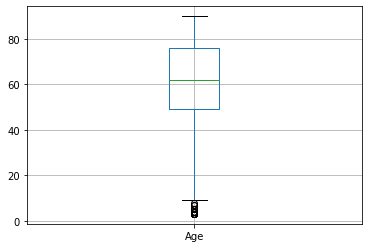

In [17]:
#here we can see that we have outliers 
DonorCharactdf.boxplot(['Age'])

In [18]:
#drop de DOB column
DonorCharactdf.drop('DOB',inplace=True,axis = 1)

### Removing Age outliers

In [19]:
# Compute the IQR
# CODE HERE
#q1= DonorCharactdf.quantile(0.25).Age
#q3= DonorCharactdf.quantile(0.75).Age
#Iqr = q3 - q1

# Compute upper and lower limit (lower_limit = Q1 -1.5*IQR | upper_limit = Q3 + 1.5*IQR)
#lower_lim = q1 - 1.5*Iqr
#upper_lim = q3 + 1.5*Iqr

#initial_len = DonorCharactdf.shape[0]

#DonorCharactdf = DonorCharactdf[~(DonorCharactdf['Age'] < lower_lim) | (DonorCharactdf['Age'] > upper_lim)]

#len_afterremov = DonorCharactdf.shape[0]

#print('Percentage of data kept after removing outliers:', np.round(len_afterremov / initial_len, 4))

## NUMCHILD

In [20]:
#too many null values for Number of Childrens so we will drop that column
DonorCharactdf.drop('NUMCHLD',inplace=True,axis = 1)

## GENDER

In [21]:
#checking all the values for the Gender
#M = Male
#F = Female
#U = Unknown
#J = Joint Account
print(DonorCharactdf['GENDER'].unique())

#replacing unknown values to 'U'
DonorCharactdf['GENDER'].replace(' ','U',inplace=True)
DonorCharactdf['GENDER'].replace('A','U',inplace=True)
DonorCharactdf['GENDER'].replace('C','U',inplace=True)

#checking the difference
print(DonorCharactdf['GENDER'].unique())

['F', 'M', ' ', 'C', 'U', 'J', 'A']
Categories (7, object): ['F', 'M', ' ', 'C', 'U', 'J', 'A']
['F', 'M', 'U', 'J']
Categories (4, object): ['F', 'M', 'U', 'J']


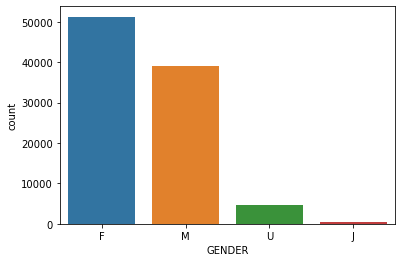

In [22]:
sns.countplot(x=DonorCharactdf['GENDER'],order = DonorCharactdf['GENDER'].value_counts().index)
plt.show()

## INCOME

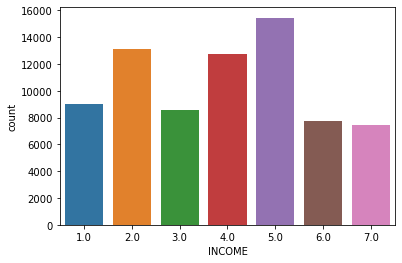

In [23]:
#get a distribution of the income
sns.countplot(x = DonorCharactdf['INCOME'])
plt.show()

## STATE

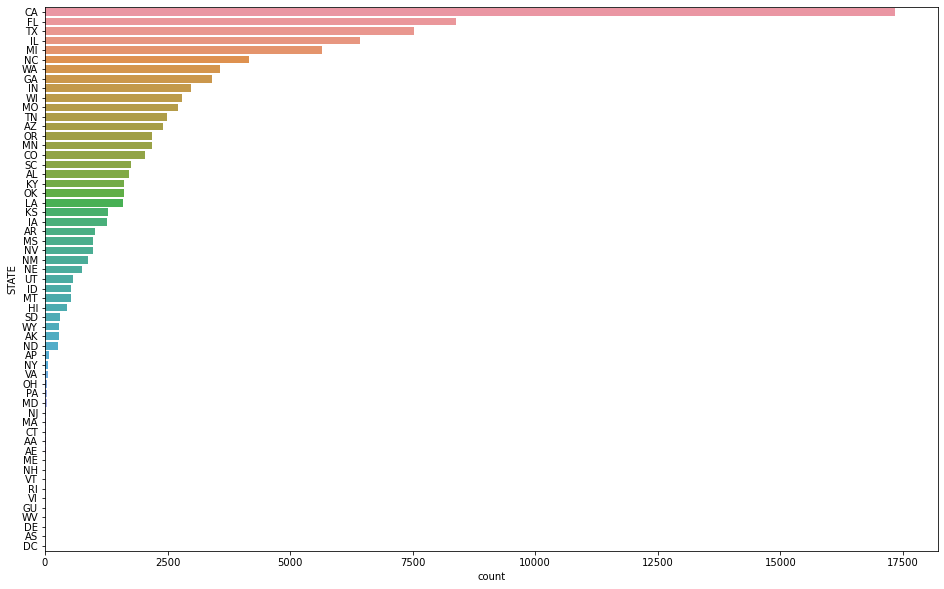

In [24]:
plt.figure(figsize=(16,10))
sns.countplot(y = DonorCharactdf.STATE , order = DonorCharactdf.STATE.value_counts().index)
plt.show()

## Wealth

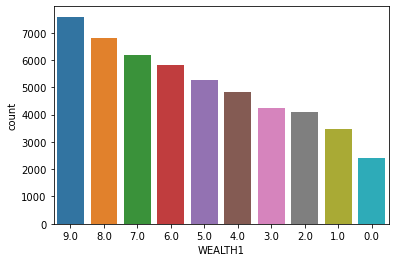

In [25]:
#get a distribution of the wealth
sns.countplot(x = DonorCharactdf.WEALTH1,order = DonorCharactdf.WEALTH1.value_counts().index)
plt.show()

## Home Owners

In [26]:
DonorCharactdf.HOMEOWNR.unique()

[' ', 'H', 'U']
Categories (3, object): [' ', 'H', 'U']

In [27]:
DonorCharactdf.HOMEOWNR.replace(' ','U',inplace=True)

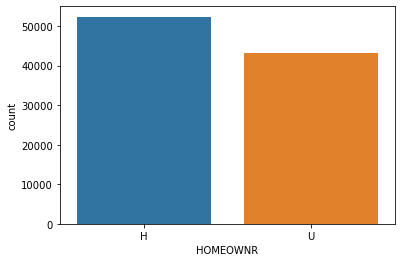

In [28]:
#get a distribution of the home owners
sns.countplot(x = DonorCharactdf.HOMEOWNR,order = DonorCharactdf.HOMEOWNR.value_counts().index)
plt.show()

## Domain

In [29]:
DonorCharactdf.DOMAIN.unique()

['T2', 'S1', 'R2', 'S2', 'T1', ..., 'U2', 'C3', 'U4', 'S3', 'T3']
Length: 17
Categories (17, object): ['T2', 'S1', 'R2', 'S2', ..., 'C3', 'U4', 'S3', 'T3']

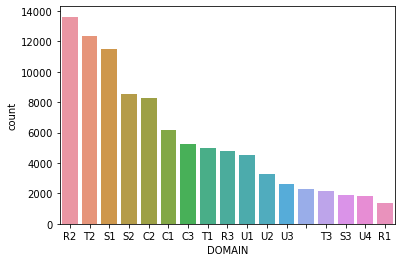

In [30]:
#get a distribution of the domains
sns.countplot(x = DonorCharactdf.DOMAIN,order = DonorCharactdf.DOMAIN.value_counts().index)
plt.show()

## Flags

In [31]:
DonorCharactdf[['RECINHSE','RECP3','RECPGVG','RECSWEEP','HOMEOWNR','HIT']]

RECINHSE RECP3 RECPGVG RECSWEEP HOMEOWNR  HIT
CONTROLN                                              
95515                                           U    0
148535                                          H   16
15078                                           U    2
172556                                          U    2
7112            X     X                         H   60
...           ...   ...     ...      ...      ...  ...
184568                                          U    0
122706                                          H    1
189641                X                         U    0
4693            X                               H    0
185114          X             X                 U    3

[95412 rows x 6 columns]

In [32]:
DonorCharactdf[['RECINHSE','RECP3','RECPGVG','RECSWEEP']] = DonorCharactdf[['RECINHSE','RECP3','RECPGVG','RECSWEEP']].replace(' ',0)
DonorCharactdf[['RECINHSE','RECP3','RECPGVG','RECSWEEP']] = DonorCharactdf[['RECINHSE','RECP3','RECPGVG','RECSWEEP']].replace('X',1)
DonorCharactdf[['RECINHSE','RECP3','RECPGVG','RECSWEEP']]  = DonorCharactdf[['RECINHSE','RECP3','RECPGVG','RECSWEEP']].astype(bool)

In [33]:
DonorCharactdf[['RECINHSE','RECP3','RECPGVG','RECSWEEP','HOMEOWNR','HIT']]

RECINHSE  RECP3  RECPGVG  RECSWEEP HOMEOWNR  HIT
CONTROLN                                                  
95515        False  False    False     False        U    0
148535       False  False    False     False        H   16
15078        False  False    False     False        U    2
172556       False  False    False     False        U    2
7112          True   True    False     False        H   60
...            ...    ...      ...       ...      ...  ...
184568       False  False    False     False        U    0
122706       False  False    False     False        H    1
189641       False   True    False     False        U    0
4693          True  False    False     False        H    0
185114        True  False     True     False        U    3

[95412 rows x 6 columns]

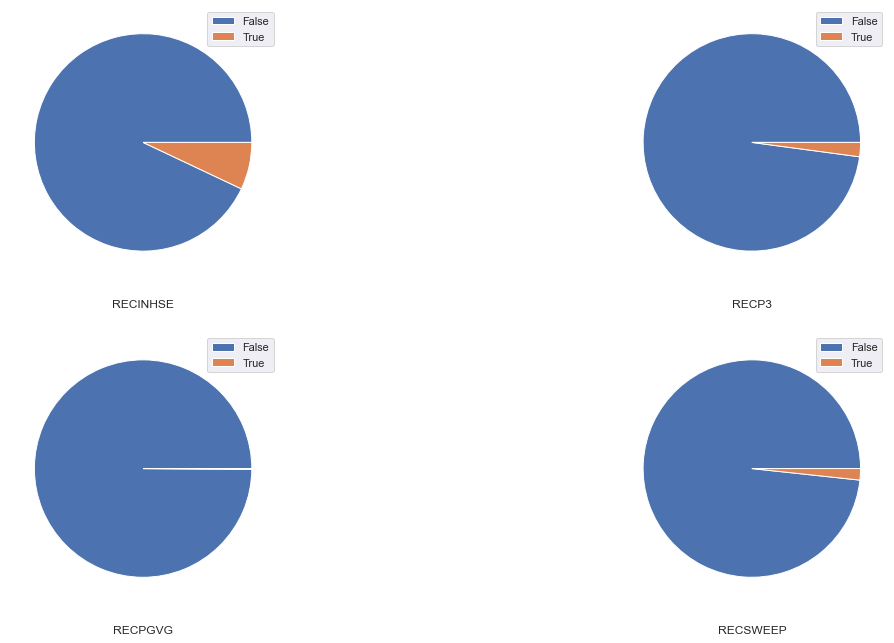

In [34]:
plotdf = DonorCharactdf[['RECINHSE','RECP3','RECPGVG','RECSWEEP']].apply(pd.value_counts)

#plot pie charts for all the interests

sns.set()

fig, axes = plt.subplots(2, ceil(len(plotdf.columns.to_list()) / 2), figsize=(20,11))

for ax, feat in zip(axes.flatten(), plotdf.columns.to_list()):
    ax.pie(plotdf[feat])
    ax.set_title(feat, y=-0.13)
    ax.legend(plotdf.index)

plt.show()

we drop the PVASTATE and NOEXCH column because doesn't add relevant information

In [35]:
DonorCharactdf.drop('PVASTATE',inplace=True,axis = 1)
DonorCharactdf.drop('NOEXCH',inplace=True,axis = 1)

In [36]:
DonorCharactdf.dtypes

ODATEDW     datetime64[ns]
OSOURCE           category
TCODE             category
STATE             category
ZIP               category
RECINHSE              bool
RECP3                 bool
RECPGVG               bool
RECSWEEP              bool
MDMAUD            category
DOMAIN            category
HOMEOWNR          category
INCOME            category
GENDER            category
WEALTH1            float64
HIT                  int64
Age                float64
dtype: object

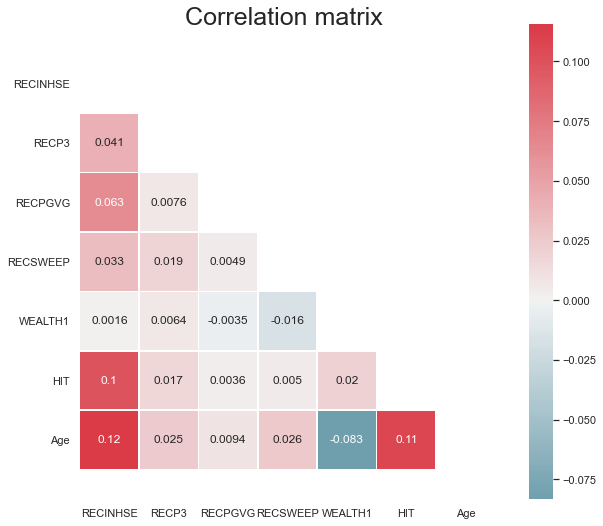

In [37]:
#correlation between all metric values
corrheatmap(DonorCharactdf)

# Donor's Interests

In [38]:
#Dataframe containing every donor's interests
InterestsDf = df.loc[:, 'COLLECT1':'PLATES']
InterestsDf.set_index(df['CONTROLN'], inplace=True)
#Replace the values for booleans
InterestsDf = InterestsDf.replace(' ',0)
InterestsDf = InterestsDf.replace('Y',1)
InterestsDf  = InterestsDf.astype(bool)
InterestsDf

COLLECT1  VETERANS  BIBLE  CATLG  HOMEE   PETS  CDPLAY  STEREO  \
CONTROLN                                                                   
95515        False     False  False  False  False  False   False   False   
148535       False     False  False  False  False  False   False   False   
15078        False     False  False  False  False  False   False   False   
172556       False     False  False  False  False  False   False   False   
7112         False     False   True   True  False  False   False    True   
...            ...       ...    ...    ...    ...    ...     ...     ...   
184568       False     False  False  False  False  False   False   False   
122706       False     False  False  False  False  False   False   False   
189641       False     False  False  False  False  False   False   False   
4693         False     False  False  False  False  False   False   False   
185114       False     False  False  False  False  False   False   False   

          PCOWNERS  PHOTO  CRAFTS  FISHER  GARDENIN  BOATS  WALKER  KIDSTUFF  \
CONTROLN                                                                       
95515        False  False   False   False     False  False   False     False   
148535       False  False   False   False     False  False   False     False   
15078        False  False   False   False     False  False   False     False   
172556       False  False   False   False     False  False   False     False   
7112         False  False    True   False      True  False    True     False   
...            ...    ...     ...     ...       ...    ...     ...       ...   
184568       False  False   False   False     False  False   False     False   
122706       False  False   False   False     False  False   False     False   
189641       False  False   False   False     False  False   False     False   
4693         False  False   False   False     False  False   False     False   
185114       False  False   False   False     False  False   False     False   

          CARDS  PLATES  
CONTROLN                 
95515     False   False  
148535    False   False  
15078     False   False  
172556    False   False  
7112       True   False  
...         ...     ...  
184568    False   False  
122706    False   False  
189641    False   False  
4693      False   False  
185114    False   False  

[95412 rows x 18 columns]

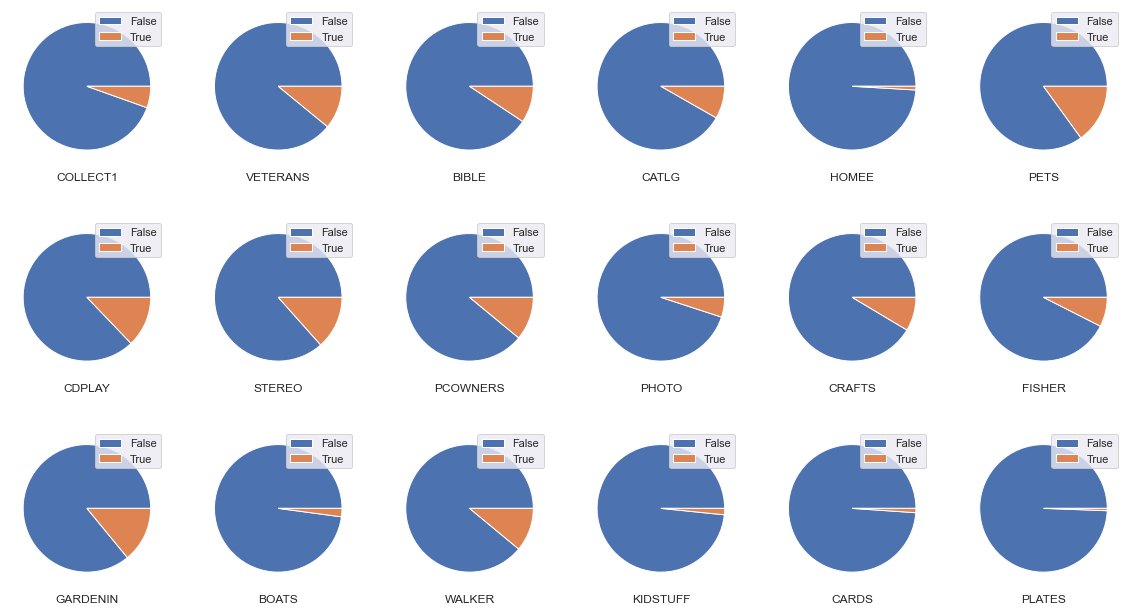

In [39]:
plotdf = InterestsDf.apply(pd.value_counts)

#plot pie charts for all the interests

sns.set()

fig, axes = plt.subplots(3, ceil(len(plotdf.columns.to_list()) / 3), figsize=(20,11))

for ax, feat in zip(axes.flatten(), plotdf.columns.to_list()):
    ax.pie(plotdf[feat])
    ax.set_title(feat, y=-0.13)
    ax.legend(plotdf.index)

plt.show() 

# Donor's Gifts

In [40]:
GiftsDf = df.loc[:, ['ODATEDW','RAMNTALL','NGIFTALL','CARDGIFT','LASTGIFT','LASTDATE','FISTDATE','AVGGIFT']]
GiftsDf.set_index(df['CONTROLN'], inplace=True)
GiftsDf

ODATEDW  RAMNTALL  NGIFTALL  CARDGIFT  LASTGIFT    LASTDATE  \
CONTROLN                                                                   
95515     2009-01-01     240.0        31        14      10.0  2015-12-01   
148535    2014-01-01      47.0         3         1      25.0  2015-12-01   
15078     2010-01-01     202.0        27        14       5.0  2015-12-01   
172556    2007-01-01     109.0        16         7      10.0  2015-12-01   
7112      2006-01-01     254.0        37         8      15.0  2016-01-01   
...              ...       ...       ...       ...       ...         ...   
184568    2016-01-01      25.0         1         0      25.0  2016-02-01   
122706    2016-01-01      20.0         1         0      20.0  2016-03-01   
189641    2015-01-01      58.0         7         4      10.0  2016-10-01   
4693      2006-01-01     498.0        41        18      18.0  2017-01-01   
185114    2008-01-01    3775.0        39        11     100.0  2016-12-01   

            FISTDATE    AVGGIFT  
CONTROLN                         
95515     2009-11-01   7.741935  
148535    2013-10-01  15.666667  
15078     2010-01-01   7.481481  
172556    2007-02-01   6.812500  
7112      1999-03-01   6.864865  
...              ...        ...  
184568    2016-02-01  25.000000  
122706    2016-03-01  20.000000  
189641    2014-10-01   8.285714  
4693      2006-12-01  12.146341  
185114    2008-03-01  96.794872  

[95412 rows x 8 columns]

In [41]:
GiftsDf.isnull().sum().sort_values(ascending=False)

FISTDATE    2
AVGGIFT     0
LASTDATE    0
LASTGIFT    0
CARDGIFT    0
NGIFTALL    0
RAMNTALL    0
ODATEDW     0
dtype: int64

In [42]:
GiftsDf.ODATEDW = pd.to_datetime(GiftsDf.ODATEDW, format='%Y-%m-%d' , errors='coerce')
GiftsDf.LASTDATE = pd.to_datetime(GiftsDf.LASTDATE, format='%Y-%m-%d' , errors='coerce')
GiftsDf.FISTDATE = pd.to_datetime(GiftsDf.FISTDATE, format='%Y-%m-%d' , errors='coerce')

In [43]:
GiftsDf.dtypes

ODATEDW     datetime64[ns]
RAMNTALL           float64
NGIFTALL             int64
CARDGIFT             int64
LASTGIFT           float64
LASTDATE    datetime64[ns]
FISTDATE    datetime64[ns]
AVGGIFT            float64
dtype: object

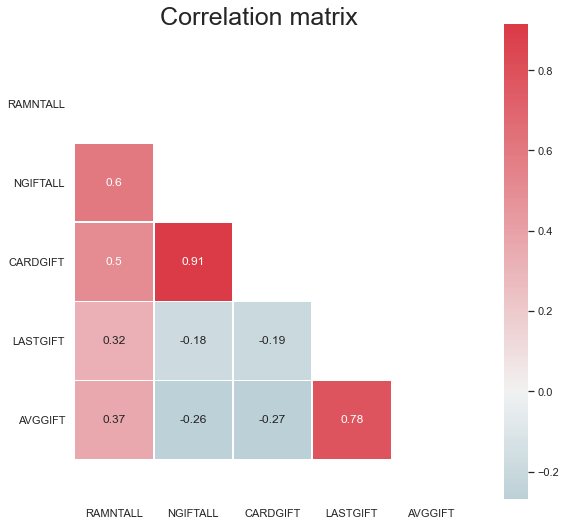

In [44]:
#correlation heatmap
corrheatmap(GiftsDf)

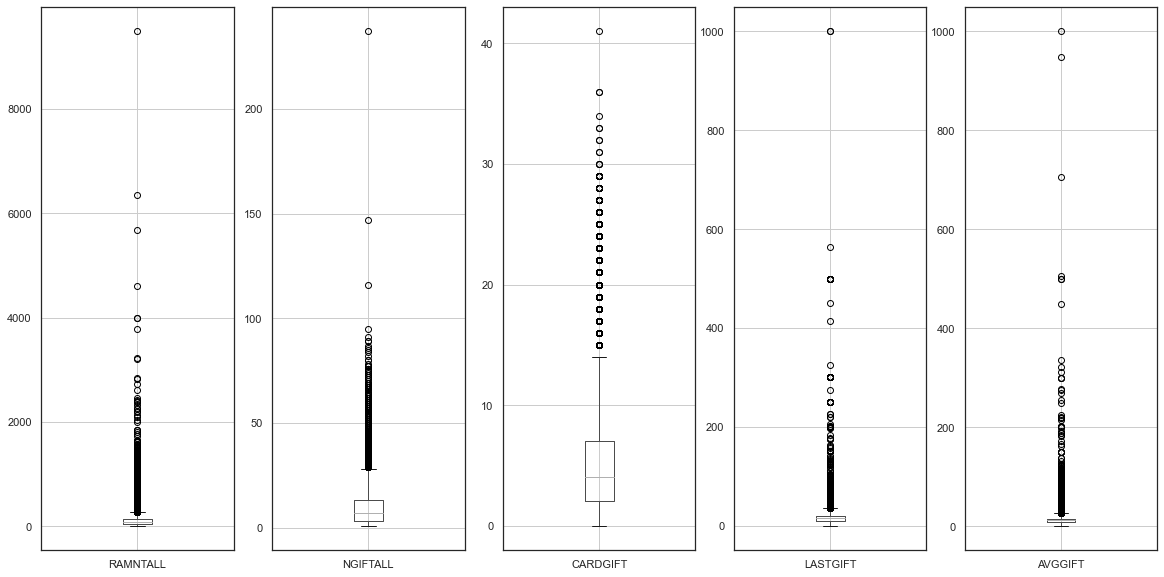

In [45]:
metric_GiftsDf = GiftsDf[['RAMNTALL','NGIFTALL','CARDGIFT','LASTGIFT','AVGGIFT']]

fig, axes = plt.subplots(1,5,figsize=(20,10)) # create figure and axes

for i,el in enumerate(list(metric_GiftsDf.columns.values)):
    metric_GiftsDf.boxplot(el,ax=axes.flatten()[i]) 
    
plt.show()

# Donor's neighborhood

In [46]:
DfNeighborhood = df.loc[:,'POP901':'AC2']
DfNeighborhood.set_index(df['CONTROLN'], inplace=True)

In [47]:
DfNeighborhood.head()

POP901  POP902  POP903  POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  \
CONTROLN                                                                        
95515        992     264     332        0       35       65       47       53   
148535      3611     940     998       99        0        0       50       50   
15078       7001    2040    2669        0        2       98       49       51   
172556       640     160     219        0        8       92       54       46   
7112        2520     627     761       99        0        0       46       54   

          ETH1  ETH2  ...  HC16  HC17  HC18  HC19  HC20  HC21  MHUC1  MHUC2  \
CONTROLN              ...                                                     
95515       92     1  ...     0    33    65    40    99    99      6      2   
148535      67     0  ...     0    99     0    99    99    99     20      4   
15078       96     2  ...    15    22    77    17    97    92      9      2   
172556      61     0  ...    16    23    77    22    93    89     16      2   
7112         2    98  ...     0    99     1    21    99    96      6      2   

          AC1  AC2  
CONTROLN            
95515      10    7  
148535      6    5  
15078       6    5  
172556      6    6  
7112        7   11  

[5 rows x 286 columns]

In [48]:
DfNeighborhood.dtypes

POP901     int64
POP902     int64
POP903     int64
POP90C1    int64
POP90C2    int64
           ...  
HC21       int64
MHUC1      int64
MHUC2      int64
AC1        int64
AC2        int64
Length: 286, dtype: object

In [49]:
DfNeighborhood.isnull().sum().sort_values(ascending=False)

DMA       132
ADI       132
MSA       132
HHD12       0
ETHC1       0
         ... 
OCC7        0
OCC6        0
OCC5        0
OCC4        0
POP901      0
Length: 286, dtype: int64

## Population

In [50]:
DfPopulation = DfNeighborhood.loc[:,'POP901':'POP90C5']
DfPopulation

POP901  POP902  POP903  POP90C1  POP90C2  POP90C3  POP90C4  POP90C5
CONTROLN                                                                     
95515        992     264     332        0       35       65       47       53
148535      3611     940     998       99        0        0       50       50
15078       7001    2040    2669        0        2       98       49       51
172556       640     160     219        0        8       92       54       46
7112        2520     627     761       99        0        0       46       54
...          ...     ...     ...      ...      ...      ...      ...      ...
184568     27380    7252   10037       99        0        0       50       50
122706      1254     322     361       96        0        4       51       49
189641       552     131     205       99        0        0       53       47
4693        1746     432     508       99        0        0       47       53
185114      3935    1192    1342       99        0        0       48       52

[95412 rows x 8 columns]

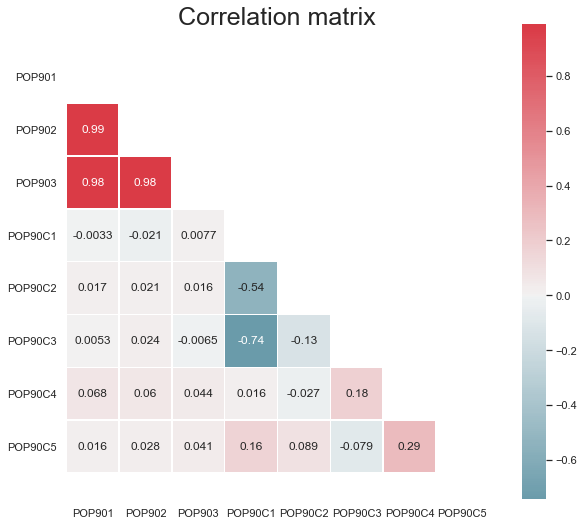

In [51]:
#correlation heatmap
corrheatmap(DfPopulation)

We have to delete the column POP902 and POP903 because it has a correlation too high comparing to POP901 and make the information redudant

In [52]:
DfPopulation.drop(['POP902','POP903'],inplace=True,axis = 1)

## Ethnic group

In [53]:
#to characterize the ethical group in each neighborhood we pick the most general columns
DfEthnic = DfNeighborhood.loc[:,'ETH1':'ETH6']
DfEthnic

ETH1  ETH2  ETH3  ETH4  ETH5  ETH6
CONTROLN                                    
95515       92     1     0     0    11     0
148535      67     0     0    31     6     4
15078       96     2     0     0     2     0
172556      61     0     0    11    32     6
7112         2    98     0     0     1     0
...        ...   ...   ...   ...   ...   ...
184568      78    10     6     4     5     0
122706      91     3     0     2     6     1
189641      82    14     0     1     9     0
4693        92     1     1     5     8     0
185114      86    12     0     1     1     0

[95412 rows x 6 columns]

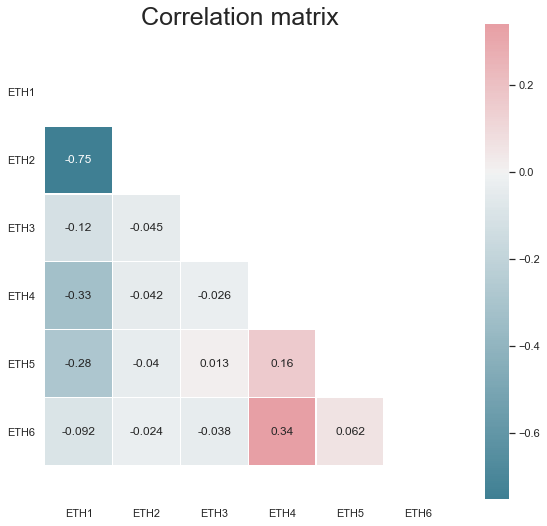

In [54]:
#correlation heatmap
corrheatmap(DfEthnic)

## Population Age

In [55]:
DfAge = DfNeighborhood[['AGE904','AGE907']]
DfAge

AGE904  AGE907
CONTROLN                
95515         40      25
148535        32      32
15078         37      23
172556        34      25
7112          36      27
...          ...     ...
184568        29      30
122706        28      39
189641        30      32
4693          36      25
185114        33      29

[95412 rows x 2 columns]

## Marital Status

In [56]:
DfMStatus = DfNeighborhood.loc[:,'MARR1':'MARR4']
DfMStatus

MARR1  MARR2  MARR3  MARR4
CONTROLN                            
95515        61      7     12     19
148535       69      4      3     24
15078        63      9      9     19
172556       63      9      6     23
7112         42     17      9     33
...         ...    ...    ...    ...
184568       58     15      3     24
122706       73      4      2     20
189641       45     19      5     31
4693         56      9      8     27
185114       73      6      3     18

[95412 rows x 4 columns]

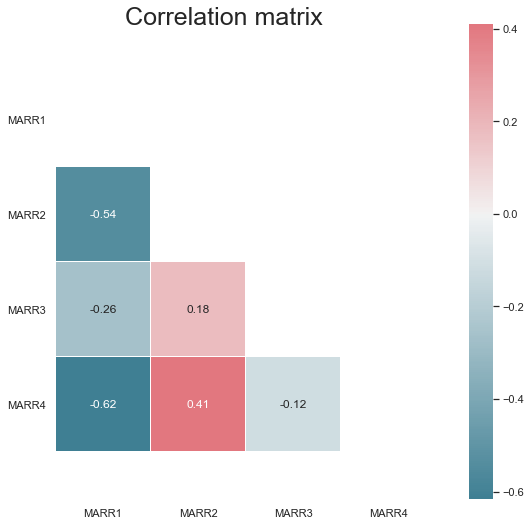

In [57]:
corrheatmap(DfMStatus)

In [58]:
DfHousing = DfNeighborhood.loc[:,'HV2':'HU5']
DfHousing

HV2  HV3  HV4  HU1  HU2  HU3  HU4  HU5
CONTROLN                                         
95515      635    3    2   86   14   96    4    7
148535    5218   12   10   96    4   97    3    9
15078      546    2    1   78   22   93    7   18
172556    1263    2    1   48   52   93    7    6
7112       594    4    3   90   10   97    3    0
...        ...  ...  ...  ...  ...  ...  ...  ...
184568    1025    6    6   56   44   89   11    3
122706    1723    3    3   88   12   97    3    0
189641     377    4    3   66   34   95    5   10
4693      2459   11   10   88   12   99    1    0
185114    1049    5    5   91    9   93    7   10

[95412 rows x 8 columns]

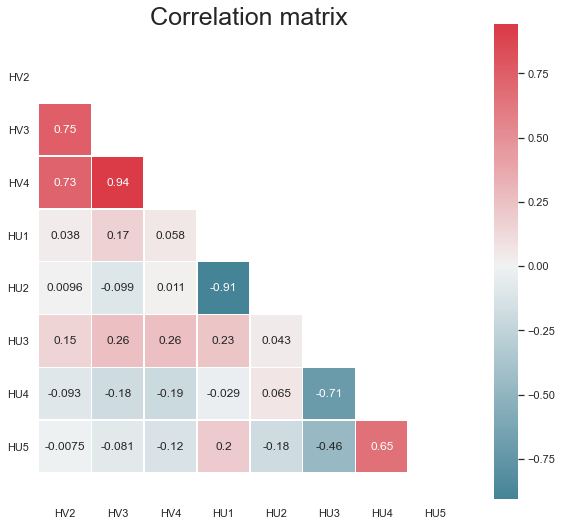

In [59]:
corrheatmap(DfHousing)

In [60]:
DfHousing.drop(['HV3','HV4'],inplace=True,axis = 1)

## Households

In [61]:
DfHH = DfNeighborhood.loc[:,'HHD1':'HHD12']
DfHH

HHD1  HHD2  HHD3  HHD4  HHD5  HHD6  HHD7  HHD8  HHD9  HHD10  HHD11  \
CONTROLN                                                                       
95515       38    80    70    32    84    16     6     2     5      9     15   
148535      59    94    88    55    95     5     4     1     3      5      4   
15078       36    76    65    30    86    14     7     2     5     11     17   
172556      36    73    61    30    84    16     6     3     3     21     12   
7112        42    82    49    22    92     8    20     3    17      9     23   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...    ...    ...   
184568      44    72    56    32    83    17    12     3    10     16     15   
122706      63    89    85    60    96     4     2     1     1      7      5   
189641      37    64    43    21    80    20    16     2    14     21     20   
4693        44    85    71    36    84    16     8     2     6      9     12   
185114      50    89    80    44    95     5     5     1     4      7      8   

          HHD12  
CONTROLN         
95515         3  
148535        2  
15078         3  
172556        4  
7112          1  
...         ...  
184568        8  
122706        1  
189641        9  
4693          6  
185114        2  

[95412 rows x 12 columns]

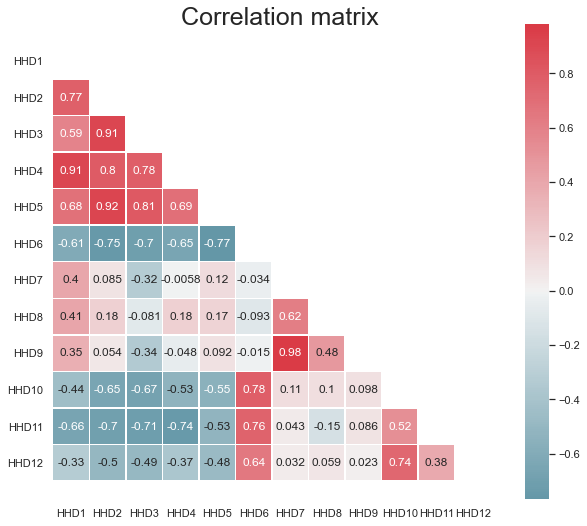

In [62]:
corrheatmap(DfHH)

In [63]:
DfHH.drop(['HHD2','HHD4','HHD5','HHD9','HHD10','HHD11'],inplace=True,axis = 1)

## Codes and Incomes

In [64]:
DfCodesIncomes = DfNeighborhood.loc[:,['MSA','ADI','DMA','IC4','IC5']]
DfCodesIncomes

MSA    ADI    DMA   IC4    IC5
CONTROLN                                   
95515        0.0  177.0  682.0   378  12883
148535    4480.0   13.0  803.0  1037  36175
15078        0.0  281.0  518.0   340  11576
172556    9340.0   67.0  862.0   423  15130
7112      5000.0  127.0  528.0   321   9836
...          ...    ...    ...   ...    ...
184568     380.0    0.0  743.0   535  18807
122706    3360.0  201.0  618.0   849  26538
189641    4040.0   61.0  551.0   345  12178
4693      8735.0   13.0  803.0   556  15948
185114    9200.0  355.0  550.0   519  16699

[95412 rows x 5 columns]

In [65]:
DfCodesIncomes.MSA = DfCodesIncomes.MSA.astype('category')
DfCodesIncomes.ADI = DfCodesIncomes.ADI.astype('category')
DfCodesIncomes.DMA = DfCodesIncomes.DMA.astype('category')

In [66]:
DfCodesIncomes.dtypes

MSA    category
ADI    category
DMA    category
IC4       int64
IC5       int64
dtype: object

## Social Assistance

In [67]:
DfSocialAss = DfNeighborhood.loc[:,'HHAS1':'HHAS4']
DfSocialAss

HHAS1  HHAS2  HHAS3  HHAS4
CONTROLN                            
95515        28      4     51      1
148535        6      2     66      3
15078        28      8     31     11
172556       22     14     26     20
7112         35      8     11     14
...         ...    ...    ...    ...
184568        9      6     70      6
122706        8      5     61      7
189641       10     13     26     26
4693         25      2     46      3
185114       19      1     54      3

[95412 rows x 4 columns]

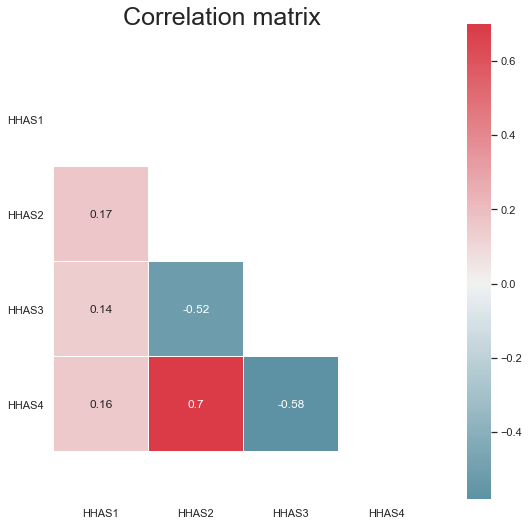

In [68]:
corrheatmap(DfSocialAss)

## Movimentation

In [69]:
DfMov = DfNeighborhood.loc[:,['TPE1','TPE2','TPE3','TPE7','TPE8','TPE9','TPE11','PEC1']]
DfMov

TPE1  TPE2  TPE3  TPE7  TPE8  TPE9  TPE11  PEC1
CONTROLN                                                 
95515       88     8     0     0     0     4     16     1
148535      80    14     0     0     0     6     32     0
15078       74    22     0     0     2     2     24     1
172556      58    36     0     0     6     0     15     0
7112        73    22     1     0     3     1     27     2
...        ...   ...   ...   ...   ...   ...    ...   ...
184568      76    15     2     0     5     2     20     1
122706      80     4     4     0     6     5     32     3
189641      83    17     0     0     0     0     17     0
4693        80    11     0     1     2     6     28     0
185114      85    13     1     0     0     1     21     2

[95412 rows x 8 columns]

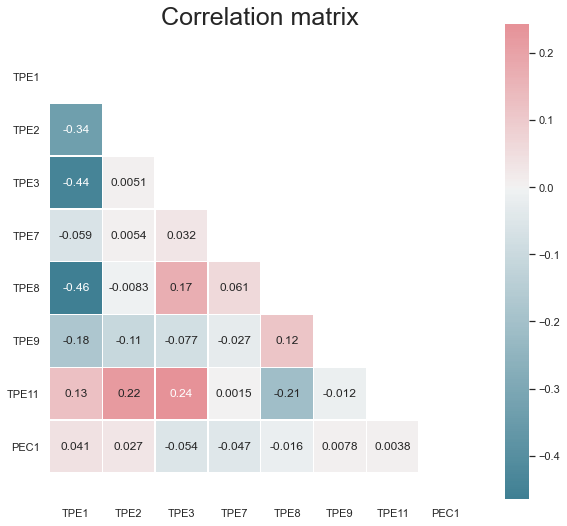

In [70]:
corrheatmap(DfMov)

## Job Areas

In [71]:
DfJobs = DfNeighborhood.loc[:,'OCC1':'OCC13']
DfJobs

OCC1  OCC2  OCC3  OCC4  OCC5  OCC6  OCC7  OCC8  OCC9  OCC10  OCC11  \
CONTROLN                                                                       
95515        9     3     8    13     9     0     3     9     3     15     19   
148535      22    24     4    21    13     2     1     6     0      4      1   
15078       10     5     2     6    12     0     1     9     5     18     20   
172556      17     3     0     6     6     0     0    13    42     12      0   
7112        17     8     2     6    15     3     7    22     2      9      0   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...    ...    ...   
184568      15    16     5    10    21     0     3    11     1     11      2   
122706      18    31     0    13    17     0     1     2     4      6      0   
189641       5    13     9     5    22     0     2    14     0     13      9   
4693        14    16     6    16    17     0     2    12     1     11      2   
185114      25    18     5    13    14     0     3     6     0      7      2   

          OCC12  OCC13  
CONTROLN                
95515         5      4  
148535        0      3  
15078         5      7  
172556        0      0  
7112          7      2  
...         ...    ...  
184568        3      3  
122706        3      5  
189641        5      2  
4693          0      2  
185114        3      2  

[95412 rows x 13 columns]

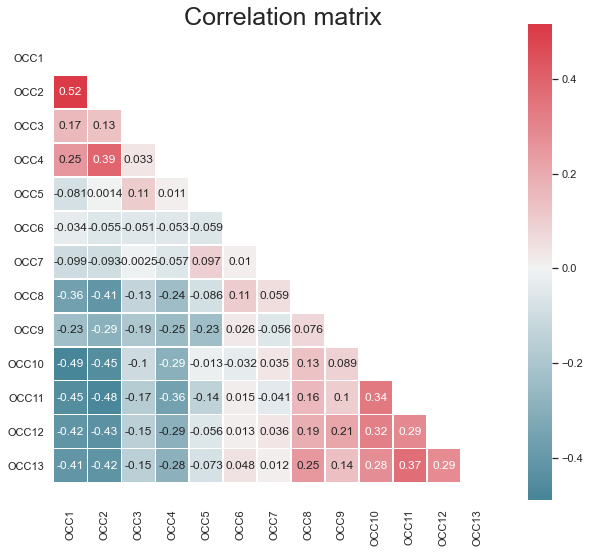

In [72]:
corrheatmap(DfJobs)

## School and Military Service

In [73]:
DfSchoolMilitary = DfNeighborhood.loc[:,['EC1','EC4','EC7','SEC1','SEC2','AFC1','VC1','VC3','VC4']]
DfSchoolMilitary

EC1  EC4  EC7  SEC1  SEC2  AFC1  VC1  VC3  VC4
CONTROLN                                                
95515     120   39    4     5    20     0   34   18   16
148535    160   12   30    14    24     0   55   11    0
15078     120   28    5     1    23     0   28   32    8
172556    120   14    3     0    19     0   14   31   16
7112      120   30   12     2    26     1    9   53   20
...       ...  ...  ...   ...   ...   ...  ...  ...  ...
184568    136   28   15     3    26     8   48   11   25
122706    160   12   36     9    35     0   43   19   15
189641    120   51   11     6    32     0   46   20   20
4693      140   20   15     6    29     0   35   20    8
185114    140   23   28     4    25     1   22   27   15

[95412 rows x 9 columns]

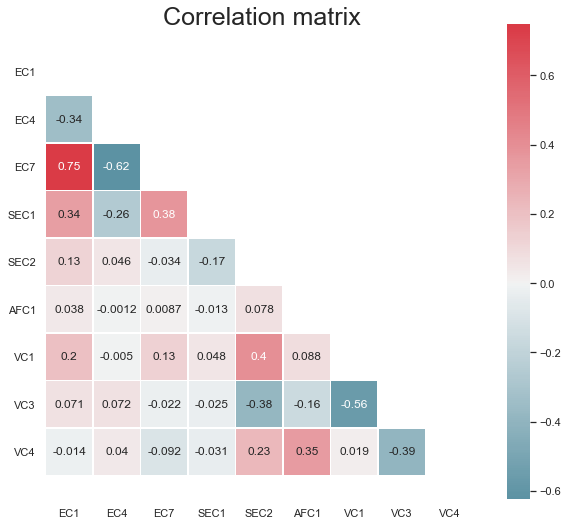

In [74]:
corrheatmap(DfSchoolMilitary)

# Result_DF - Join all the previous Dataframes

## Joining Neighborhood

In [75]:
DfNeighborhood_Final = pd.concat([DfPopulation, DfEthnic,DfAge,DfMStatus,DfHousing,DfHH,DfCodesIncomes,DfSocialAss,DfMov,DfJobs,DfSchoolMilitary], axis=1, join='inner')
DfNeighborhood_Final.head()

POP901  POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  ETH2  \
CONTROLN                                                                    
95515        992        0       35       65       47       53    92     1   
148535      3611       99        0        0       50       50    67     0   
15078       7001        0        2       98       49       51    96     2   
172556       640        0        8       92       54       46    61     0   
7112        2520       99        0        0       46       54     2    98   

          ETH3  ETH4  ...  OCC13  EC1  EC4  EC7  SEC1  SEC2  AFC1  VC1  VC3  \
CONTROLN              ...                                                     
95515        0     0  ...      4  120   39    4     5    20     0   34   18   
148535       0    31  ...      3  160   12   30    14    24     0   55   11   
15078        0     0  ...      7  120   28    5     1    23     0   28   32   
172556       0    11  ...      0  120   14    3     0    19     0   14   31   
7112         0     0  ...      2  120   30   12     2    26     1    9   53   

          VC4  
CONTROLN       
95515      16  
148535      0  
15078       8  
172556     16  
7112       20  

[5 rows x 69 columns]

In [76]:
#find features with correlations greater than 0.9 in order to remove them
limit = 0.90
corr = DfNeighborhood_Final.corr()
mask = np.triu(np.ones(corr.shape), k=1).astype(bool)
corr_no_diag = corr.where(mask)
coll = [c for c in corr_no_diag.columns if any(abs(corr_no_diag[c]) > limit)]
coll

['HU2', 'HHD1', 'HHD3']

In [77]:
#dropping high correlated features
DfNeighborhood_Final.drop(coll,axis=1,inplace=True)

In [78]:
DfNeighborhood_Final

POP901  POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  ETH2  \
CONTROLN                                                                    
95515        992        0       35       65       47       53    92     1   
148535      3611       99        0        0       50       50    67     0   
15078       7001        0        2       98       49       51    96     2   
172556       640        0        8       92       54       46    61     0   
7112        2520       99        0        0       46       54     2    98   
...          ...      ...      ...      ...      ...      ...   ...   ...   
184568     27380       99        0        0       50       50    78    10   
122706      1254       96        0        4       51       49    91     3   
189641       552       99        0        0       53       47    82    14   
4693        1746       99        0        0       47       53    92     1   
185114      3935       99        0        0       48       52    86    12   

          ETH3  ETH4  ...  OCC13  EC1  EC4  EC7  SEC1  SEC2  AFC1  VC1  VC3  \
CONTROLN              ...                                                     
95515        0     0  ...      4  120   39    4     5    20     0   34   18   
148535       0    31  ...      3  160   12   30    14    24     0   55   11   
15078        0     0  ...      7  120   28    5     1    23     0   28   32   
172556       0    11  ...      0  120   14    3     0    19     0   14   31   
7112         0     0  ...      2  120   30   12     2    26     1    9   53   
...        ...   ...  ...    ...  ...  ...  ...   ...   ...   ...  ...  ...   
184568       6     4  ...      3  136   28   15     3    26     8   48   11   
122706       0     2  ...      5  160   12   36     9    35     0   43   19   
189641       0     1  ...      2  120   51   11     6    32     0   46   20   
4693         1     5  ...      2  140   20   15     6    29     0   35   20   
185114       0     1  ...      2  140   23   28     4    25     1   22   27   

          VC4  
CONTROLN       
95515      16  
148535      0  
15078       8  
172556     16  
7112       20  
...       ...  
184568     25  
122706     15  
189641     20  
4693        8  
185114     15  

[95412 rows x 66 columns]

In [79]:
DfNeighborhood_Final.columns

Index(['POP901', 'POP90C1', 'POP90C2', 'POP90C3', 'POP90C4', 'POP90C5', 'ETH1',
       'ETH2', 'ETH3', 'ETH4', 'ETH5', 'ETH6', 'AGE904', 'AGE907', 'MARR1',
       'MARR2', 'MARR3', 'MARR4', 'HV2', 'HU1', 'HU3', 'HU4', 'HU5', 'HHD6',
       'HHD7', 'HHD8', 'HHD12', 'MSA', 'ADI', 'DMA', 'IC4', 'IC5', 'HHAS1',
       'HHAS2', 'HHAS3', 'HHAS4', 'TPE1', 'TPE2', 'TPE3', 'TPE7', 'TPE8',
       'TPE9', 'TPE11', 'PEC1', 'OCC1', 'OCC2', 'OCC3', 'OCC4', 'OCC5', 'OCC6',
       'OCC7', 'OCC8', 'OCC9', 'OCC10', 'OCC11', 'OCC12', 'OCC13', 'EC1',
       'EC4', 'EC7', 'SEC1', 'SEC2', 'AFC1', 'VC1', 'VC3', 'VC4'],
      dtype='object')